In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [26]:
df = pd.read_csv("50_Startups.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
df.duplicated().sum()

0

In [27]:
df =df.rename({'R&D Spend':"RND", "Administration":"Admin","Marketing Spend": "Mrktng"},axis=1)
df

,RND,Admin,Mrktng,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [28]:
df.corr()

<ipython-input-28-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RND,Admin,Mrktng,Profit
RND,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
Mrktng,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


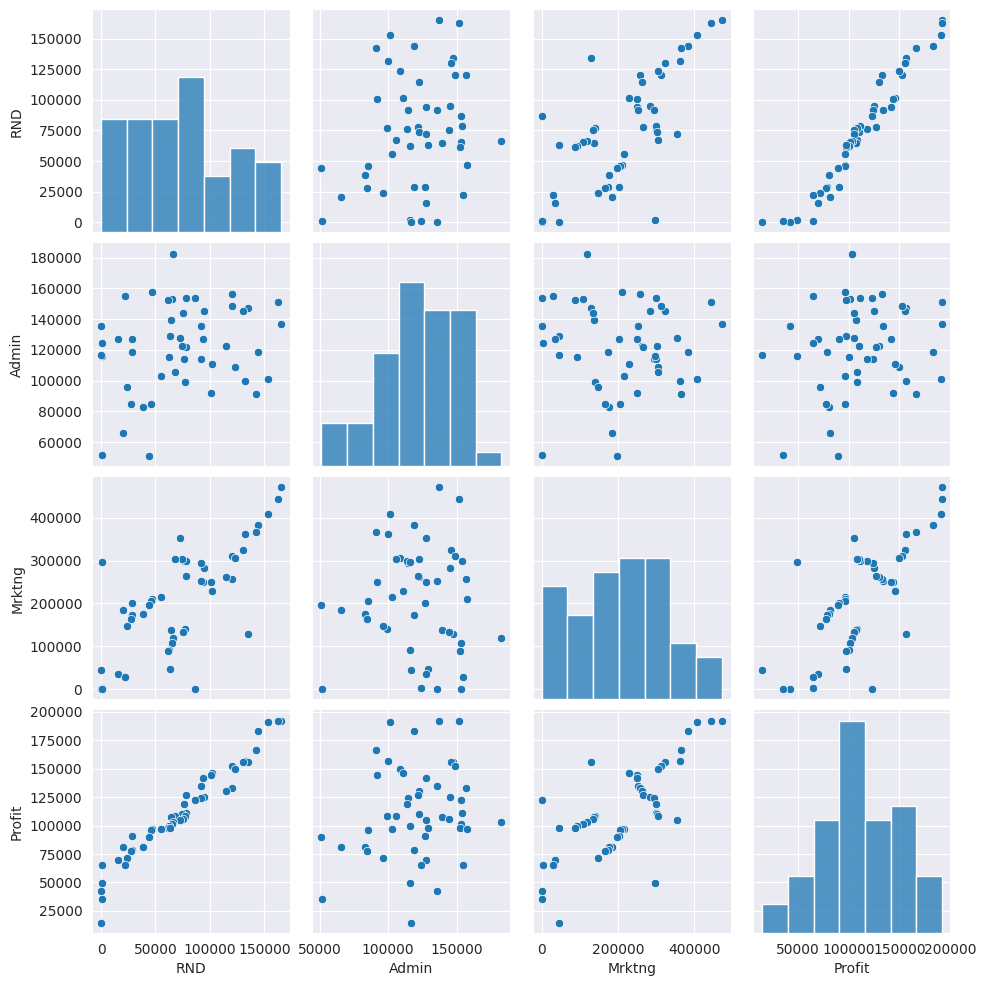

In [29]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [30]:
model =smf.ols("Profit~RND+Admin+Mrktng", data=df).fit()

In [31]:
model.params

Intercept    50122.192990
RND              0.805715
Admin           -0.026816
Mrktng           0.027228
dtype: float64

In [32]:
model.rsquared, model.aic

(0.9507459940683246, 1058.7714985998055)

In [33]:
print(model.tvalues,"\n", model.pvalues)

Intercept     7.626218
RND          17.846374
Admin        -0.525507
Mrktng        1.655077
dtype: float64 
 Intercept    1.057379e-09
RND          2.634968e-22
Admin        6.017551e-01
Mrktng       1.047168e-01
dtype: float64


In [34]:
model_admin =smf.ols("Profit~Admin", data=df).fit()
model_admin.tvalues, model_admin.pvalues

(Intercept    3.040044
 Admin        1.419493
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64)

In [35]:
model_mrktng =smf.ols("Profit~Mrktng", data=df).fit()
model_mrktng.tvalues, model_mrktng.pvalues

(Intercept    7.808356
 Mrktng       7.802657
 dtype: float64,
 Intercept    4.294735e-10
 Mrktng       4.381073e-10
 dtype: float64)

In [37]:
model_am=smf.ols("Profit~Admin+Mrktng", data=df).fit()
model_am.tvalues, model_am.pvalues

(Intercept    1.142741
 Admin        2.467779
 Mrktng       8.281039
 dtype: float64,
 Intercept    2.589341e-01
 Admin        1.729198e-02
 Mrktng       9.727245e-11
 dtype: float64)

In [40]:
rsq_rnd=smf.ols("RND~Admin+Mrktng", data=df).fit().rsquared
vif_rnd=1/(1-rsq_rnd)

rsq_admin=smf.ols("Admin~RND+Mrktng", data=df).fit().rsquared
vif_admin=1/(1-rsq_admin)

rsq_mrk=smf.ols("Mrktng~RND+Admin", data=df).fit().rsquared
vif_mrk=1/(1-rsq_mrk)

d1 = {"Variables": ["RND", "Admin", "Marketing"], "Vif_Values": [vif_rnd, vif_admin, vif_mrk]}

vif_frame=pd.DataFrame(d1)
vif_frame



,Variables,Vif_Values
0,RND,2.468903
1,Admin,1.175091
2,Marketing,2.326773


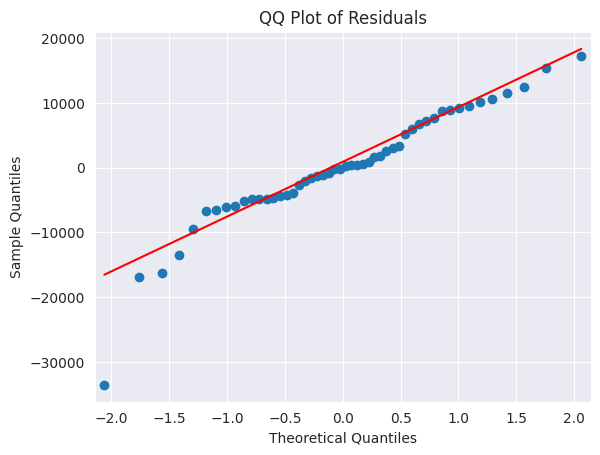

In [41]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("QQ Plot of Residuals")
plt.show()

In [44]:
list(np.where(model.resid<-30000 ))

[array([49])]

In [45]:
def get_standard_vals (val):
  x = (val-val.mean())/val.std()
  return x

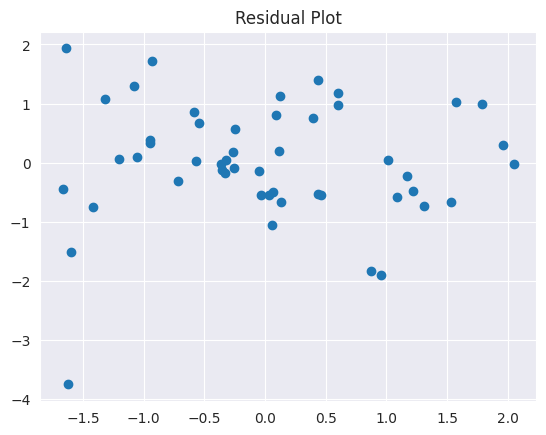

In [46]:
plt.scatter(get_standard_vals(model.fittedvalues),get_standard_vals(model.resid))
plt.title("Residual Plot")
plt.show()

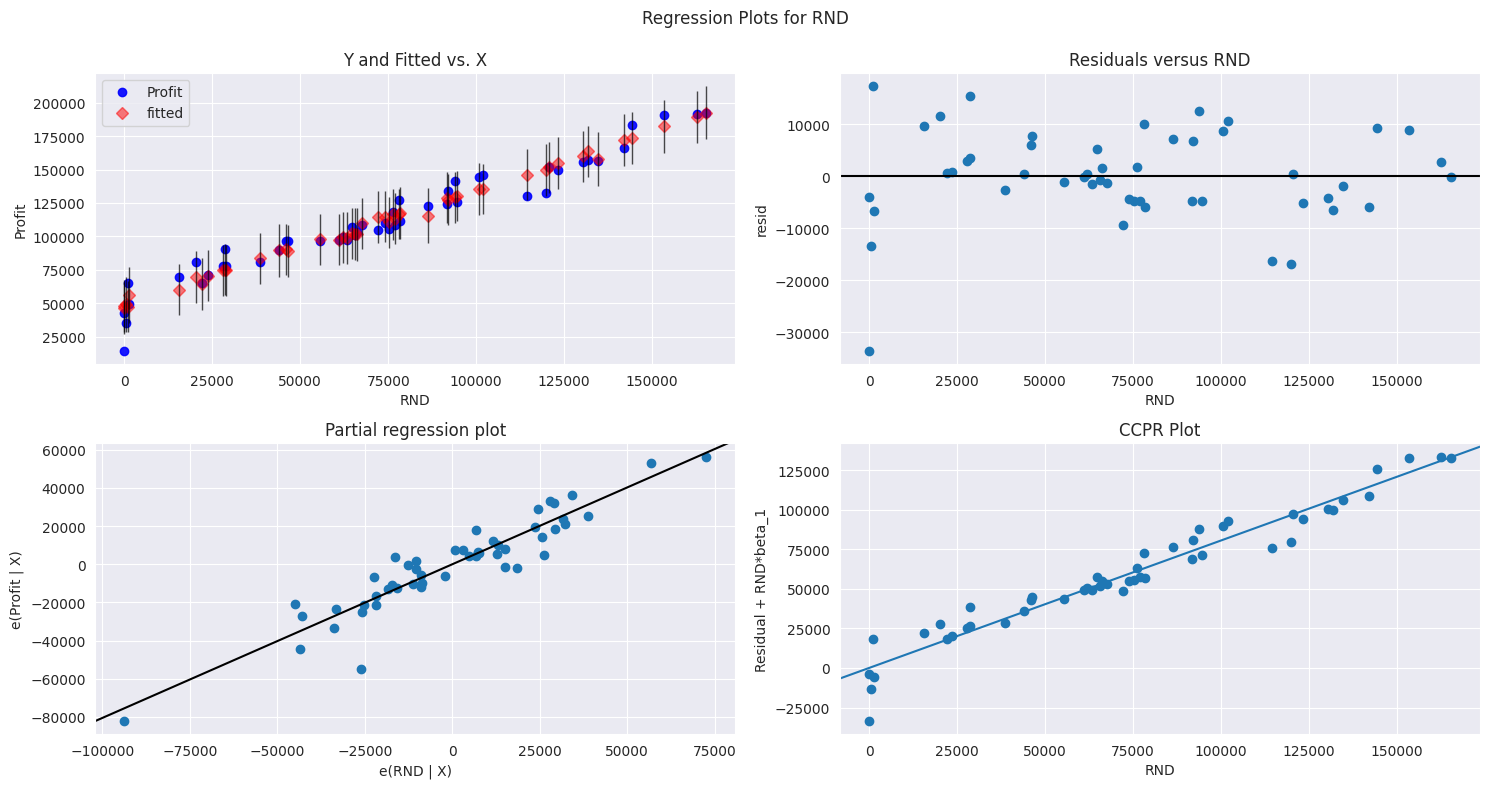

In [47]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "RND", fig=fig)
plt.show()

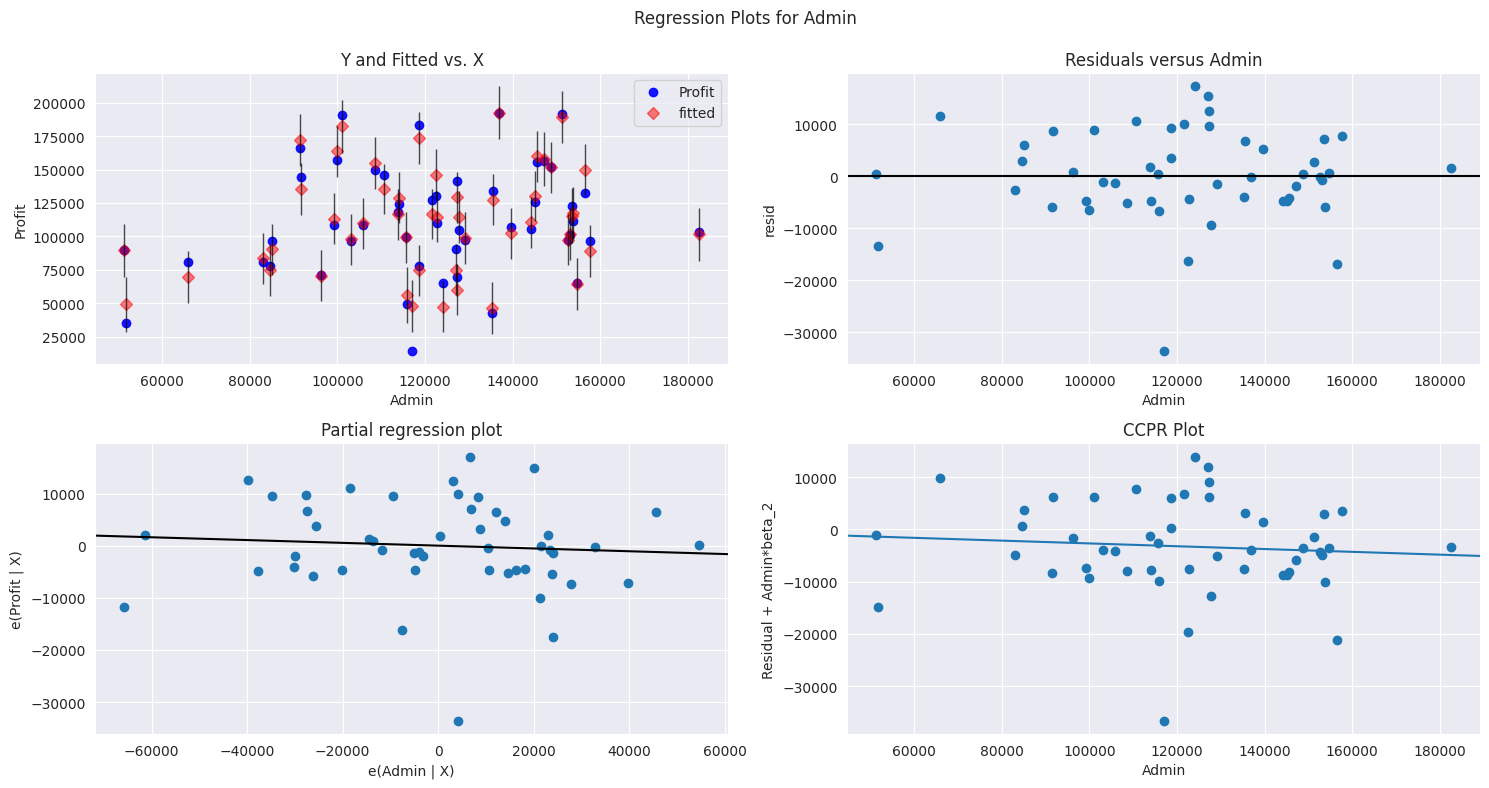

In [48]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()

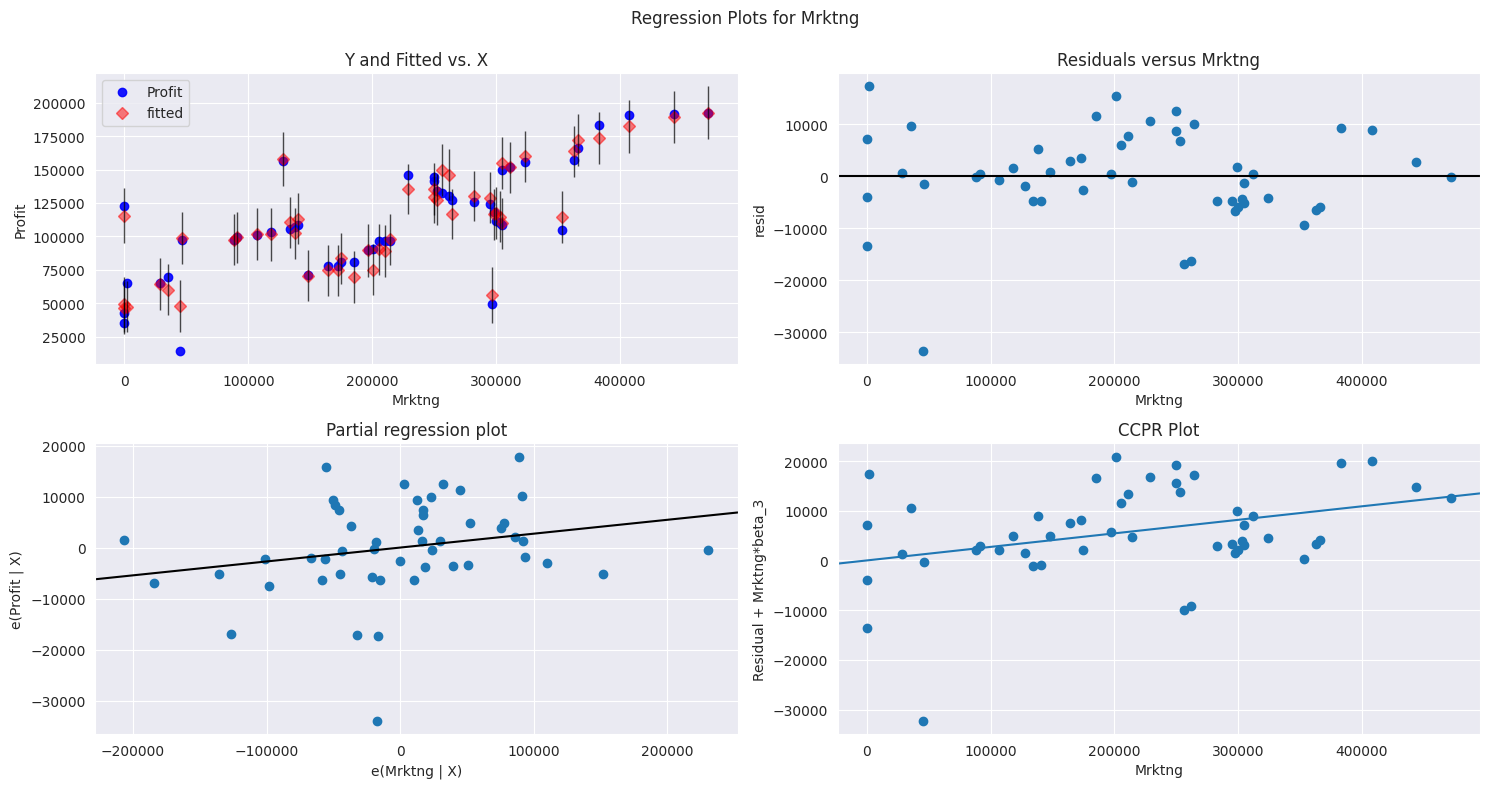

In [49]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model, "Mrktng", fig=fig)
plt.show()

In [50]:
(c,_)=model.get_influence().cooks_distance

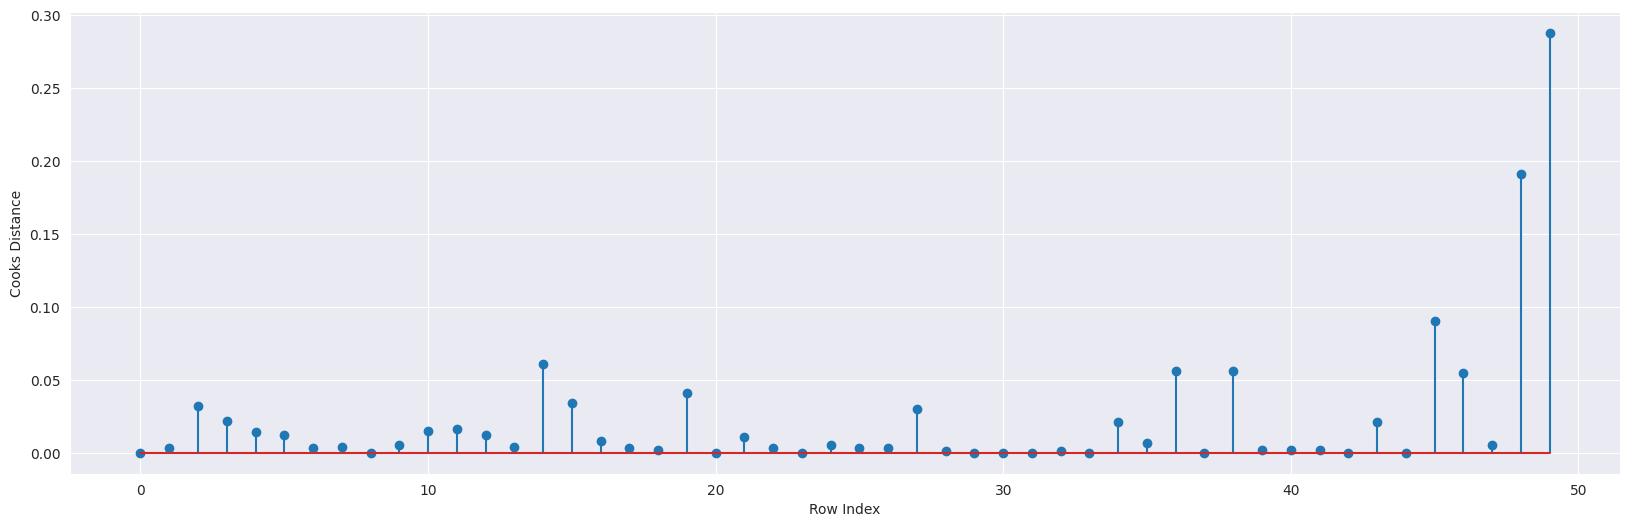

In [51]:
fig=plt.subplots(figsize=(20,6))
fig=plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [52]:
np.argmax(c), np.max(c)

(49, 0.2880822927543272)

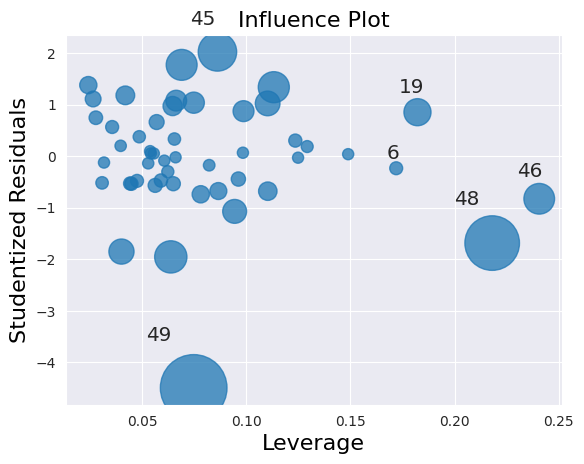

In [53]:
influence_plot(model)
plt.show()

In [54]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff =3*((k+1)/n)
leverage_cutoff

0.36

In [57]:
df[df.index.isin([49])]

,RND,Admin,Mrktng,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [60]:
data=df.copy()
data

,RND,Admin,Mrktng,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [62]:
data=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data

,RND,Admin,Mrktng,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [73]:
model2=smf.ols("Profit~RND+Admin+Mrktng",data=data).fit()

In [74]:
model2.rsquared, model2.aic

(0.9613162435129847, 1020.5652974526367)

In [76]:
(c2,_)=model2.get_influence().cooks_distance
c2

array([1.66350327e-03, 1.23799116e-02, 6.50218747e-02, 4.03899998e-02,
       1.28650631e-02, 1.21058543e-02, 2.73552112e-03, 3.61057988e-03,
       2.02797815e-04, 5.30263697e-03, 2.14218192e-02, 2.37342297e-02,
       1.58363724e-02, 5.22784116e-03, 8.43989066e-02, 4.65559091e-02,
       1.07193528e-02, 5.12051798e-03, 3.22585991e-03, 4.29215716e-02,
       3.40892355e-04, 1.88659002e-02, 5.25774010e-03, 8.63061914e-04,
       9.41132587e-03, 2.64353068e-03, 7.04291169e-03, 4.71293937e-02,
       4.68589970e-05, 1.23474983e-03, 1.33416709e-04, 8.33867345e-04,
       3.47851752e-03, 6.91264848e-04, 1.96199658e-02, 6.20542092e-03,
       6.41990558e-02, 5.15924382e-04, 5.90383781e-02, 5.21168130e-03,
       6.18372420e-04, 5.54615495e-04, 2.62020740e-04, 1.76373696e-02,
       1.77776263e-03, 9.79664450e-02, 1.39422650e-01, 2.47514796e-02,
       3.92744206e-01])

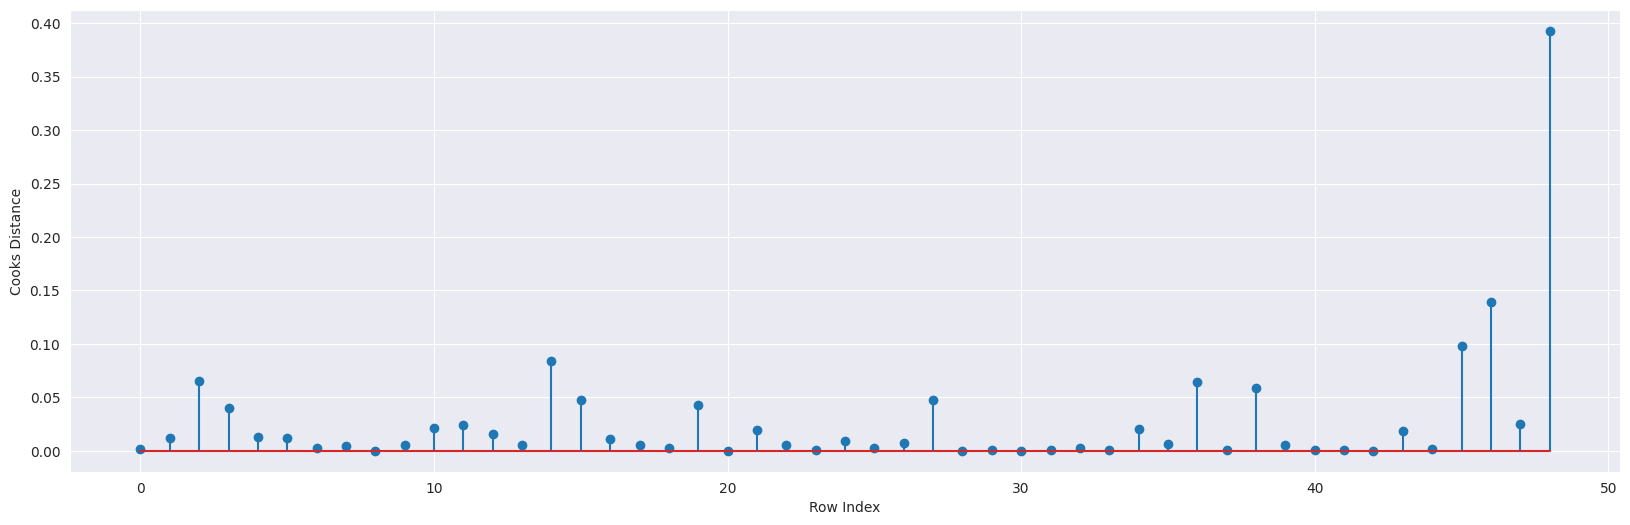

In [77]:
fig=plt.subplots(figsize=(20,6))
fig=plt.stem(np.arange(len(data)),np.round(c2,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [78]:
np.argmax(c2), np.max(c2)

(48, 0.39274420556321443)

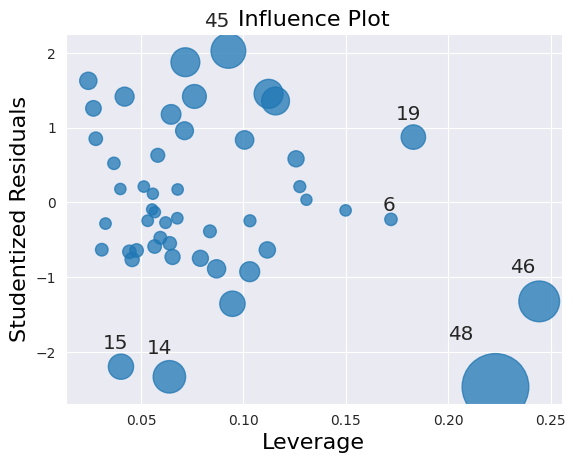

In [79]:
influence_plot(model2)
plt.show()

In [71]:
k2=data.shape[1]
n2=data.shape[0]
leverage_cutoff2=3*((k2+1)/n2)
leverage_cutoff2

0.36734693877551017

In [80]:
data[data.index.isin([48])]

,RND,Admin,Mrktng,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [72]:
data2=data.copy()
data2

,RND,Admin,Mrktng,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [81]:
data2=data2.drop(data2.index[[48]],axis=0).reset_index(drop=True)
data2

,RND,Admin,Mrktng,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [82]:
model3 =smf.ols("Profit~RND+Admin+Mrktng",data=data2).fit()

In [83]:
model3.rsquared, model3.aic

(0.9626766170294073, 994.6690439260116)

In [84]:
(c3,_)=model3.get_influence().cooks_distance
c3

array([0.0094125 , 0.03599295, 0.07038599, 0.04910179, 0.02027973,
       0.01581269, 0.00508904, 0.00203414, 0.00139645, 0.00741048,
       0.02122911, 0.02036064, 0.01761793, 0.0065972 , 0.08739921,
       0.05356297, 0.01189486, 0.00394455, 0.00383202, 0.03474835,
       0.00036025, 0.01334921, 0.00501967, 0.00125401, 0.02328487,
       0.00260973, 0.00828195, 0.0439174 , 0.00219589, 0.00131071,
       0.00179249, 0.00104067, 0.00938565, 0.00186774, 0.03319456,
       0.00319554, 0.07149117, 0.02037088, 0.04383268, 0.01633989,
       0.0002867 , 0.0002371 , 0.00246905, 0.01432865, 0.00257352,
       0.0951408 , 0.13829134, 0.03936831])

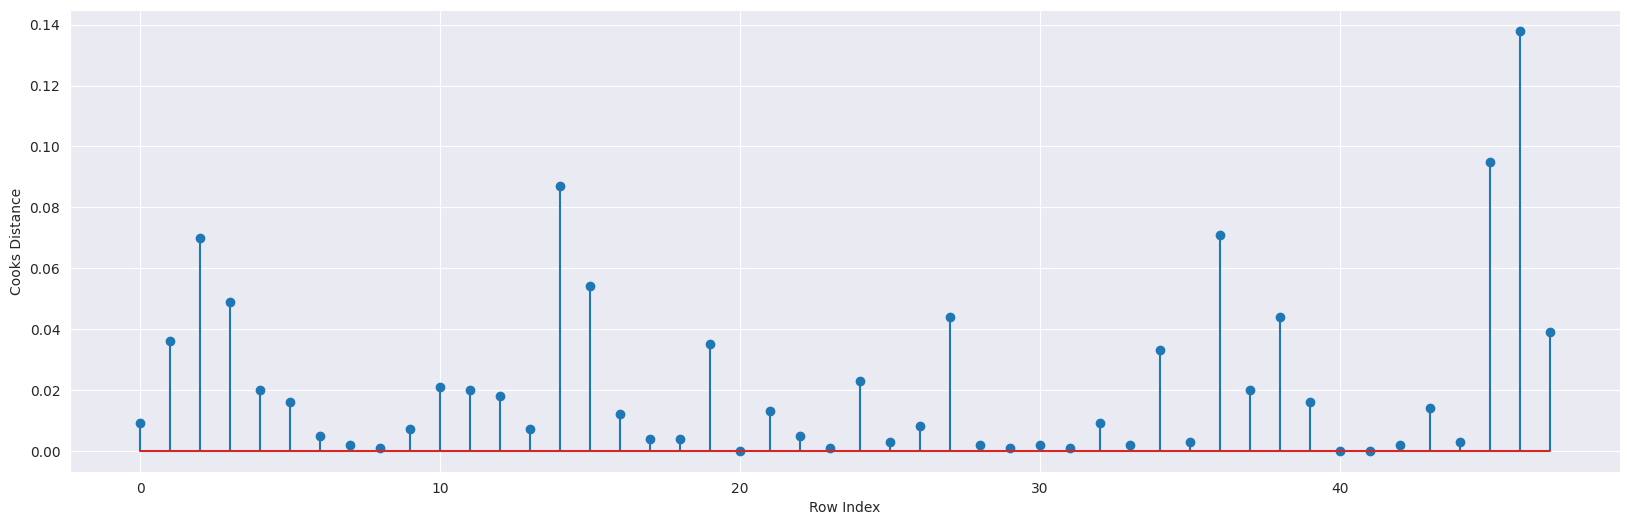

In [85]:
fig=plt.subplots(figsize=(20,6))
fig=plt.stem(np.arange(len(data2)),np.round(c3,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")
plt.show()

In [87]:
np.argmax(c3), np.max(c3)

(46, 0.13829133994334297)

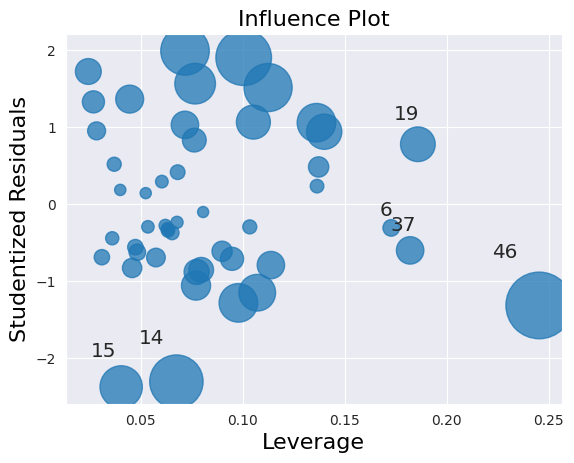

In [89]:
influence_plot(model3)
plt.show()

In [90]:
k3=data2.shape[1]
n3=data2.shape[0]
leverage_cutoff3=3*((k3+1)/n3)
leverage_cutoff3

0.375

In [91]:
new_data=pd.DataFrame({'RND':71000,"Admin":87000,"Mrktng":140000},index=[0])
new_data

,RND,Admin,Mrktng
0,71000,87000,140000


In [92]:
model3.predict(new_data)

0    112006.570466
dtype: float64

In [93]:
d2 = {"Model":["Model1", "Model2", "Model3"], "Accuracy": [model.rsquared, model2.rsquared, model3.rsquared]}

Model_accuracy = pd.DataFrame(d2)
Model_accuracy

,Model,Accuracy
0,Model1,0.950746
1,Model2,0.961316
2,Model3,0.962677
